In [94]:
import numpy as np
import pandas as pd

import torch
import torch.utils.data

In [96]:
data_pos = pd.read_csv('/media/data/nlp/sentiment/ru-mokoron/positive.csv',
                   names=['id', 'date', 'user', 'text', 'sentiment'], index_col=0,
                   sep=';', usecols=[0, 1, 2, 3, 4])
data_neg = pd.read_csv('/media/data/nlp/sentiment/ru-mokoron/negative.csv',
                   names=['id', 'date', 'user', 'text', 'sentiment'], index_col=0,
                   sep=';', usecols=[0, 1, 2, 3, 4])

data = pd.concat([data_pos, data_neg])

In [100]:
len(data_pos.text), len(set(data_pos.text))

(114911, 110396)

In [65]:
%matplotlib inline
import seaborn
seaborn.set()

In [63]:
max(data.text.str.len()), max(data.text.str.split(' ').str.len())

(189, 94)

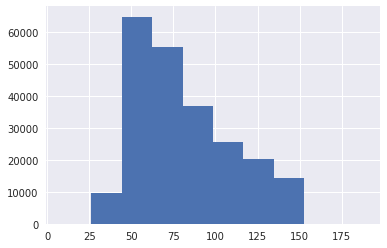

In [70]:
data.text.str.len().hist()

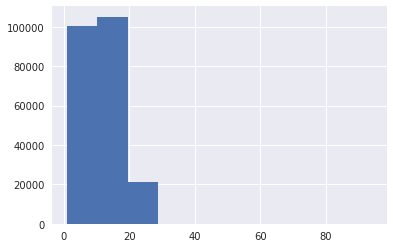

In [69]:
data.text.str.split(' ').str.len().hist()

In [3]:
data.sample(5)

,date,user,text,sentiment
id,,,,
413821004637806593,1387497590,Artem_NS,И как в этом шлюхообразном мире можно найти св...,-1
410848220143972352,1386788823,missdevine_,"среда, 18.12, волейбол. учителя vs лицеисты :)...",1
410792065178812417,1386775435,pennyroyal_teea,@cykaaaa_ я в рязани хочу учиться..в.москву бу...,1
416426390217834496,1388118762,ViktoriaMshn,@strikalo в жизни оскорблять не так просто:(,-1
411127764864217088,1386855472,AvramenkoAnuta,"У меня попугай подпевает музыке, которую я слу...",1


In [98]:
len(data.text), len(set(list(data.text)))

(226834, 217440)

## Train-val-test split

In [164]:
data = pd.read_csv('/media/data/nlp/sentiment/ru-mokoron/spellchecked.csv', index_col=0)

In [165]:
data.sample(2)

,id,original_text,sentiment,text
109500,411174049717698560,RT @pydybeheqixo: Завтра я улетаю в Москву. А ...,1,RT @pydybeheqixo: Завтра я улетаю в Москву. А ...
127808,410790557490085888,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,-1,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...


In [199]:
data.sample(100)

,id,text_original,sentiment,text_spellchecked
161648,414761184446140416,RT @ArizonaDreamer_: Я проснулся в два часа дн...,-1,RT @Arizona Dreamer_: Я проснулся в два часа д...
114210,411221965584596992,"@ivnikana спасибо, Насть) Но зимой я пас, хотя...",1,"@ivnikana спасибо, Насть) Но зимой я пас, хотя..."
130412,411094301930946561,"Ущнала,что вчера в поселке моем взорвался дом(...",-1,"Узнала,что вчера в поселке моем взорвался дом(..."
123093,410076583949778944,RT @k_bobileva: Как-то очень резко похолодало(...,-1,RT @k_bobileva: Как-то очень резко похолодало(...
117085,409342114464825345,"В последнее время теперь ложусь, в среднем, в ...",-1,"В последнее время теперь ложусь, в среднем, в ..."
64507,410359557685141505,"@elinahazza ну ок. \nтак, стоп!\nтопор нужен м...",1,"@elinahazza ну ок. \nтак, стоп!\nтопор нужен м..."
60567,410281452043898880,Сегодня как идиоты накрасили губы красной пома...,1,Сегодня как идиоты накрасили губы красной пома...
26866,409582530023522304,Партнерская программа №1 в России.Зарабатывайт...,1,Партнерская программа №1 в России.Зарабатывайт...
112770,411211516088971264,"RT @leylya1996: @yanabankovskay2 ахах оу,собст...",1,"RT @leylya1996: @yanabankovskay2 ахах оу,собст..."
34570,409767818943795200,"новый фильм с макэвоем, а этот вечер не так уж...",1,"новый фильм с макэвоем, а этот вечер не так уж..."


In [183]:
data.columns = ['id', 'text_original', 'sentiment', 'text_spellchecked']

In [184]:
len(data)

217440

In [186]:
len(data.drop_duplicates('text_original'))

217440

In [187]:
data = data.drop_duplicates('text_original')

In [188]:
indices = list(data.index)
np.random.shuffle(indices)

TEST_SIZE = 0.15
VAL_SIZE = 0.15

test_size = int(len(indices) * TEST_SIZE)
val_size = int(len(indices) * VAL_SIZE)
train_size = len(indices) - test_size - val_size

train_idxs = indices[:train_size]
valid_idxs = indices[train_size:train_size+val_size]
test_idxs = indices[train_size+val_size:]

print('Train: ', train_size)
print('Valid: ', val_size)
print('Test : ', test_size)

Train:  152208
Valid:  32616
Test :  32616


In [189]:
train_data = data.loc[train_idxs]
valid_data = data.loc[valid_idxs]
test_data = data.loc[test_idxs]

In [191]:
len(set(valid_data.text_original).intersection(set(train_data.text_original))),\
len(set(test_data.text_original).intersection(set(train_data.text_original)))

(0, 0)

In [192]:
# Это очень странно, но хотя бы их немного
len(set(valid_data.text_spellchecked).intersection(set(train_data.text_spellchecked))),\
len(set(test_data.text_spellchecked).intersection(set(train_data.text_spellchecked)))

(2, 2)

In [193]:
basepath = '/media/data/nlp/sentiment/ru-mokoron/splits/'

In [194]:
train_data.to_csv(basepath+'train.csv')
valid_data.to_csv(basepath+'validation.csv')
test_data.to_csv(basepath+'test.csv')

In [79]:
train_data = pd.read_csv(basepath+'train.csv')
valid_data = pd.read_csv(basepath+'validation.csv')
test_data = pd.read_csv(basepath+'test.csv')

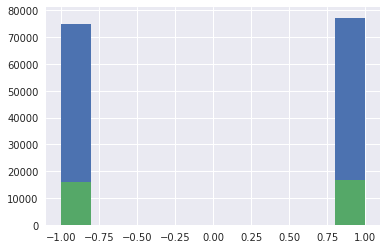

In [195]:
train_data.sentiment.hist()
valid_data.sentiment.hist()

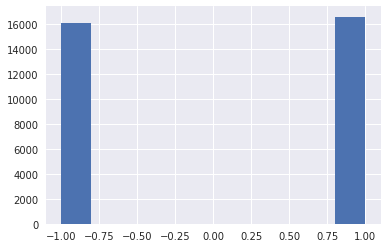

In [196]:
test_data.sentiment.hist()

# Dataset

### One-hot symbols

In [137]:
MAXLEN = 170
# Убрал () и = чтобы избавиться от смайлов
# Вернул это обратно. Хороший индикатор устойчивости к adversarial-атакам
ALPHABET = ['<UNK>'] + ['\n'] + [s for s in """ 0123456789-,;.!?:'’’/\|_@#$%ˆ&* ̃‘+-=<>()[]{}"""]
ALPHABET += [s for s in 'абвгдеёжзийклмнопрстуфхцчщъыьэюя']
ALPHABET += [s for s in 'abcdefghijklmnopqrstuvwxyz']

ALPHABET_LEN = len(ALPHABET)
char2int = {s: i for s, i in zip(ALPHABET, range(ALPHABET_LEN))}

class MokoronDatasetOneHot(torch.utils.data.Dataset):
    """
    Zero vector for padding.
    """
    noise_level = 0

    def __init__(self, filepath, text_field, maxlen=MAXLEN):
        self.alphabet = ALPHABET

        self.data = pd.read_csv(filepath)
        self.text_field = text_field
        self.maxlen = maxlen
        self.char2int = {s: i for s, i in zip(self.alphabet, range(len(self.alphabet)))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        line = self.data.iloc[idx]
        text = line[self.text_field]
        label = int(line.sentiment == 1.)

        if self.noise_level > 0:
            text = self._noise_generator(text)
        text = self._preprocess(text)
        return text, label

    def _noise_generator(self, string):
        noised = ""
        for c in string:
            if random() > self.noise_level:
                noised += c
            if random() < self.noise_level:
                noised += choice(self.alphabet)
        return noised

    def _one_hot(self, char):
        zeros = np.zeros(len(self.alphabet))
        if char in self.char2int:
            zeros[self.char2int[char]] = 1.
        else:
            zeros[self.char2int['<UNK>']] = 1.

    def _preprocess(self, text):
        text = text.lower()
        one_hotted_text = np.zeros((self.maxlen, len(self.alphabet)))
        for i, char in enumerate(text):
            if i >= self.maxlen:
                break
            one_hotted_text[i, self.char2int.get(char, self.char2int['<UNK>'])] = 1.

        return torch.FloatTensor(one_hotted_text)

    def onehot2text(self, one_hotted_text, show_pad=False):
        text = ''
        max_values, idx = torch.max(one_hotted_text, 1)
        for c, i in enumerate(idx):
            if max_values[c] == 0:
                if show_pad:
                    symb = '<PAD>'
                else:
                    symb = ''
            else:
                symb = ALPHABET[i]
            text += symb
        return text



In [138]:
dataset = MokoronDatasetOneHot(filepath=basepath+'train.csv')

In [149]:
text, sentiment = dataset[0]
text, sentiment

(
     0     0     0  ...      0     0     0
     0     0     0  ...      0     0     0
     0     0     0  ...      0     0     0
        ...          ⋱          ...       
     0     0     0  ...      0     0     0
     0     0     0  ...      0     0     0
     0     0     0  ...      0     0     0
 [torch.FloatTensor of size 170x106], 0)

In [151]:
dataset.data.iloc[0].text

'@SPB_citizen @gruppa_GS Сдулися оба.((( \nОдно радует: в семействе Гудковых не наблюдается конфликта отцов и детей.'

In [152]:
dataset.onehot2text(text)

'@spb_citizen @gruppa_gs сдулися оба.((( \nодно радует: в семействе гудковых не наблюдается конфликта отцов и детей.'

### FastText

In [101]:
from pymystem3 import Mystem

In [102]:
m = Mystem() # grammar_info=False, disambiguation=False)

Installing mystem to /home/phobos_aijun/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz


In [108]:
m.analyze('@spb_citizen @gruppa_gs сдулися оба.((( \nодно радует: в семействе гудковых не наблюдается конфликта отцов и детей.')

[{'text': '@'},
 {'analysis': [], 'text': 'spb'},
 {'text': '_'},
 {'analysis': [], 'text': 'citizen'},
 {'text': ' '},
 {'text': '@'},
 {'analysis': [], 'text': 'gruppa'},
 {'text': '_'},
 {'analysis': [], 'text': 'gs'},
 {'text': ' '},
 {'analysis': [{'gr': 'V,несов,нп=непрош,деепр',
    'lex': 'сдулисить',
    'qual': 'bastard'}],
  'text': 'сдулися'},
 {'text': ' '},
 {'analysis': [{'gr': 'NUM=(вин,муж,неод|им,муж|вин,сред|им,сред)',
    'lex': 'оба'}],
  'text': 'оба'},
 {'text': '.'},
 {'text': '((( \n'},
 {'analysis': [{'gr': 'APRO=(вин,ед,сред|им,ед,сред)', 'lex': 'один'}],
  'text': 'одно'},
 {'text': ' '},
 {'analysis': [{'gr': 'V,несов,пе=непрош,ед,изъяв,3-л', 'lex': 'радовать'}],
  'text': 'радует'},
 {'text': ': '},
 {'analysis': [{'gr': 'PR=', 'lex': 'в'}], 'text': 'в'},
 {'text': ' '},
 {'analysis': [{'gr': 'S,сред,неод=пр,ед', 'lex': 'семейство'}],
  'text': 'семействе'},
 {'text': ' '},
 {'analysis': [{'gr': 'S,фам,муж,од=(пр,мн|вин,мн|род,мн)', 'lex': 'гудков'}],
  't

In [114]:
%%time
import gensim
fasttext = gensim.models.FastText.load_fasttext_format('/media/data/nlp/data/wiki.ru.bin')

CPU times: user 3min 30s, sys: 9.56 s, total: 3min 40s
Wall time: 4min 5s


In [156]:
from random import random
from pymystem3 import Mystem


MAX_WORD_LEN = 8
MAX_TEXT_LEN = 32

ALPHABET = ['<UNK>'] + ['\n'] + [s for s in """ 0123456789-,;.!?:'’’/\|_@#$%ˆ&* ̃‘+-=<>()[]{}"""]
ALPHABET += [s for s in 'абвгдеёжзийклмнопрстуфхцчщъыьэюя']
ALPHABET += [s for s in 'abcdefghijklmnopqrstuvwxyz']

ALPHABET_LEN = len(ALPHABET)
char2int = {s: i for s, i in zip(ALPHABET, range(ALPHABET_LEN))}


class HieracialMokoron(torch.utils.data.Dataset):
    """
    Zero vector for padding.
    """
    noise_level = 0

    def __init__(self, filepath, text_field, maxwordlen=MAX_WORD_LEN, maxtextlen=MAX_TEXT_LEN):
        self.alphabet = ALPHABET

        self.mystem = Mystem()
        self.text_field = text_field
        self.data = pd.read_csv(filepath)
        self.maxwordlen = maxwordlen
        self.maxtextlen = maxtextlen
        self.char2int = {s: i for s, i in zip(self.alphabet, range(len(self.alphabet)))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        line = self.data.iloc[idx]
        text = line[self.text_field].lower()
        label = int(line.sentiment == 1.)

        if self.noise_level > 0:
            text = self._noise_generator(text)

        text = self._tokenize(text)
        text = self._preprocess_text_nobatch(text)
        return text, label

    def _tokenize(self, text):
        return [res['text'] for res in self.mystem.analyze(text) if res['text'] != ' ']

    def _noise_generator(string):
        noised = ""
        for c in string:
            if random() > self.noise_level:
                noised += c
            if random() < self.noise_level:
                noised += choice(self.alphabet)
        return noised

    def _one_hot(self, char):
        zeros = np.zeros(len(self.alphabet))
        if char in self.char2int:
            zeros[self.char2int[char]] = 1.
        else:
            zeros[self.char2int['<UNK>']] = 1.

    def _preprocess_text_nobatch(self, text):
        _text_tensor = torch.zeros([self.maxwordlen * self.maxtextlen, len(self.alphabet)])
        
        text = text.lower()
        one_hotted_text = np.zeros((self.maxlen, len(self.alphabet)))
        for i, char in enumerate(text):
            if i >= self.maxlen:
                break
            one_hotted_text[i, self.char2int.get(char, self.char2int['<UNK>'])] = 1.

        return torch.FloatTensor(one_hotted_text)

    def onehot2text(one_hotted_text, batch_size=None, show_pad=False):
        if batch_size is None:
            text = ''
            max_values, idx = torch.max(one_hotted_text, 1)
            for c, i in enumerate(idx):
                if max_values[c] == 0:
                    if show_pad:
                        symb = '<PAD>'
                    else:
                        symb = ''
                else:
                    symb = ALPHABET[i]
                text += symb
            return text
        else:
            texts = []
            for text in one_hotted_text:
                texts.append(onehot2text(one_hotted_text, batch_size=None))
            return texts

In [157]:
ftm = FastTextMokoron(basepath+'train.csv')

In [163]:
ftm[0]

((( 

: 




/home/phobos_aijun/.virtualenvs/pytorch-env/lib/python3.5/site-packages/ipykernel_launcher.py:48: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/home/phobos_aijun/.virtualenvs/pytorch-env/lib/python3.5/site-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/phobos_aijun/.virtualenvs/pytorch-env/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(
 -0.1698  0.3966 -0.0577  ...  -0.3822  0.1688  0.1148
  0.1100  0.1611  0.6203  ...  -0.4057 -0.8733  0.2973
 -0.4550  0.9556  0.1204  ...  -0.3032 -0.3318  0.1527
           ...             ⋱             ...          
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 [torch.FloatTensor of size 32x300], 0)

### Hieracial

In [198]:
MAX_WORD_LEN = 8
MAX_TEXT_LEN = 32

ALPHABET = ['<UNK>'] + ['\n'] + [s for s in """ 0123456789-,;.!?:'’’/\|_@#$%ˆ&* ̃‘+-=<>()[]{}"""]
ALPHABET += [s for s in 'абвгдеёжзийклмнопрстуфхцчщъыьэюя']
ALPHABET += [s for s in 'abcdefghijklmnopqrstuvwxyz']

ALPHABET_LEN = len(ALPHABET)
char2int = {s: i for s, i in zip(ALPHABET, range(ALPHABET_LEN))}


class HieracialMokoron(torch.utils.data.Dataset):
    """
    Zero vector for padding.
    """
    noise_level = 0

    def __init__(self, filepath, text_field, maxwordlen=MAX_WORD_LEN, maxtextlen=MAX_TEXT_LEN):
        self.alphabet = ALPHABET

        self.text_field = text_field
        self.data = pd.read_csv(filepath)
        self.maxwordlen = maxwordlen
        self.maxtextlen = maxtextlen
        self.char2int = {s: i for s, i in zip(self.alphabet, range(len(self.alphabet)))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        line = self.data.iloc[idx]
        text = line[text_field].lower()
        label = int(line.sentiment == 1.)

        if self.noise_level > 0:
            text = self._noise_generator(text)

        text = self._tokenize(text)
        text = self._preprocess_text_nobatch(text)
        return text, label

    def _noise_generator(string):
        noised = ""
        for c in string:
            if random() > self.noise_level:
                noised += c
            if random() < self.noise_level:
                noised += choice(self.alphabet)
        return noised

    def _one_hot(self, char):
        zeros = np.zeros(len(self.alphabet))
        if char in self.char2int:
            zeros[self.char2int[char]] = 1.
        else:
            zeros[self.char2int['<UNK>']] = 1.

    def _preprocess_text_nobatch(self, text):
        _text_tensor = torch.zeros([self.maxwordlen * self.maxtextlen, len(self.alphabet)])
        
        text = text.lower()
        one_hotted_text = np.zeros((self.maxlen, len(self.alphabet)))
        for i, char in enumerate(text):
            if i >= self.maxlen:
                break
            one_hotted_text[i, self.char2int.get(char, self.char2int['<UNK>'])] = 1.

        return torch.FloatTensor(one_hotted_text)

    def onehot2text(self, one_hotted_text, show_pad=False):
        text = ''
        max_values, idx = torch.max(one_hotted_text, 1)
        for c, i in enumerate(idx):
            if max_values[c] == 0:
                if show_pad:
                    symb = '<PAD>'
                else:
                    symb = ''
            else:
                symb = ALPHABET[i]
            text += symb
        return text
